In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data), len(test_data))

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step
8982 2246


In [21]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [3]:
# Decoding back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

557056/550378 [==============================] - 0s 0us/step


In [23]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[10]])
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [25]:
reverse_word_index.get(17-3)

'reuter'

In [22]:
print([i-3 for i in train_data[10]])

[-2, 242, 270, 204, 153, 50, 71, 157, 23, 11, 43, 293, 23, 36, 71, 2976, 3551, 11, 43, 4686, 4326, 83, 58, 3496, 4792, 11, 58, 448, 4326, 14, 9]


In [26]:
# Topic index, 46 classes
train_labels[10]

3

In [29]:
# One-hot encode input, transform into uniform vectors. All sequences are 10000 length
import numpy as np

from keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Code for one hot encoding label data is the exact same. Use keras.utils.to_categorical()

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

# Using larger filters (64 vs. 16 from last exercise) because of larger solution space.
# Binary classification before, now we're doing single label multi-class classification
# 16 dimensional intermediate layers may be too limited to learn 46 classes.
# Small layers can act as information bottlenecks in this way 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

# Softmax maps non-normalized output into a normal probability distribution
# Some values could be negative or >1, but after softmax result is a vector in range [0,1], all values sum to 1

In [32]:
# categorical_crossentropy measures the distance between two probability distributions
# In this case, it measure the distance between probability distribution output by the network, and the true distribution.
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 35s 4ms/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 8

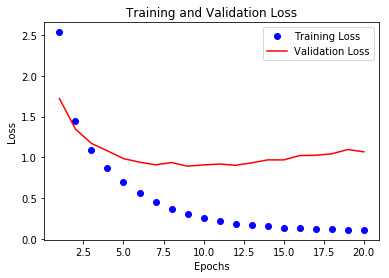

In [36]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()